In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [3]:
dataframe = pd.read_csv("sales_data.csv")
dataframe1 = dataframe.drop(["Order_ID", "Branch", "Order_Date", "Order_Priority", "Model_Name", "Screen", "OS", "OS_Version", "Quantity", "Discount", "Profit", "Ship_Duration" ,"Total_Price" ], axis=1)
dataframe1['Screen_Size'] = dataframe1['Screen_Size'].str[:-1].astype(float)
dataframe1['Screen_Size_cm'] = dataframe1['Screen_Size'] * 2.54
dataframe1["RAM"] = dataframe1['RAM'].str[:-2].astype(float)
dataframe1["RAM_meg"] = dataframe1['RAM']*1024
dataframe1["Weight_kg"] = dataframe1["Weight"].str[:-1]
dataframe1["Weight_kg"] = dataframe1["Weight_kg"].str[:-1] 

dataframe1["Weight_kg"] = pd.to_numeric(dataframe1["Weight_kg"], errors="coerce")
dataframe1["Weight_kg"] = dataframe1["Weight_kg"]* 1000
dataframe1["Storage_meg"] = dataframe1["Storage"]

In [4]:
dataset = pd.read_csv("fdataframe.csv")

In [5]:
dataset = dataset.drop(columns=['GPU' ,'Manufacturer' , 'Category' , 'CPU'])


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300749 entries, 0 to 300748
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Storage         300749 non-null  float64
 1   Screen_Size     300749 non-null  float64
 2   RAM             300749 non-null  float64
 3   Weight          300749 non-null  float64
 4   Price           300749 non-null  int64  
 5   Screen_Size_cm  300749 non-null  float64
 6   RAM_gig         300749 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 16.1 MB


In [7]:
dataset

,Storage,Screen_Size,RAM,Weight,Price,Screen_Size_cm,RAM_gig
0,2.621440e+14,15.6,8.0,2.18,3450000,39.624,8.192000e+12
1,2.621440e+14,13.3,8.0,1.30,3400000,33.782,8.192000e+12
2,2.560000e+11,15.6,8.0,2.60,44900000,39.624,8.192000e+12
3,2.621440e+14,13.3,8.0,1.40,12550000,33.782,8.192000e+12
4,2.621440e+14,15.6,4.0,2.23,2050000,39.624,4.096000e+12
...,...,...,...,...,...,...,...
300744,2.621440e+14,15.6,16.0,2.50,11450000,39.624,1.638400e+13
300745,2.560000e+11,15.6,4.0,2.40,13550000,39.624,4.096000e+12
300746,5.242880e+14,12.5,16.0,1.30,36000000,31.750,1.638400e+13
300747,2.621440e+14,11.3,8.0,1.10,2900000,28.702,8.192000e+12


In [8]:
fa = FactorAnalyzer(rotation=None)
fa.fit(dataset)
FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation=None, rotation_kwargs={},
               use_smc=True)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [9]:
fa.loadings_

array([[-0.12109995,  0.74224067,  0.65533644],
       [ 0.91690897, -0.35332117,  0.17881986],
       [ 0.5695558 ,  0.78761903, -0.22961521],
       [ 0.83964184, -0.20956473,  0.01416803],
       [ 0.06287766,  0.26377177,  0.01748507],
       [ 0.91690897, -0.35332117,  0.17881986],
       [ 0.5695558 ,  0.78761903, -0.22961521]])

In [10]:
fa.get_communalities()

array([0.99505225, 0.99753445, 0.99746069, 0.74911653, 0.07383487,
       0.99753445, 0.99746069])

In [11]:
from factor_analyzer import (ConfirmatoryFactorAnalyzer,
                               ModelSpecificationParser)

In [12]:
model_dict = {"F1": ["Storage", "RAM_gig"],
             "F2": ["Screen_Size_cm", "Weight"]}

In [13]:
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(dataset,model_dict)

In [14]:
cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False)

In [15]:
cfa.fit(dataset[["Storage", "RAM_gig", "Screen_Size_cm", "Weight"]].values)

C:\Users\Mahdi\anaconda3\Lib\site-packages\factor_analyzer\confirmatory_factor_analyzer.py:753: UserWarning: The optimization routine failed to converge: ABNORMAL_TERMINATION_IN_LNSRCH
  warnings.warn(


ConfirmatoryFactorAnalyzer(disp=False, n_obs=300749,
                           specification=<factor_analyzer.confirmatory_factor_analyzer.ModelSpecification object at 0x000001F141512A90>)

In [16]:
from sklearn.decomposition import FactorAnalysis

<Axes: ylabel='Uniqueness'>

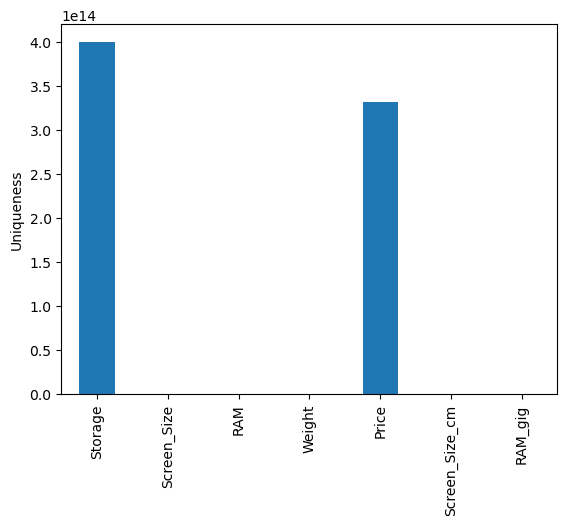

In [17]:
fa = FactorAnalysis(n_components = 2, rotation="varimax")
fa.fit(dataset)
uniqueness = pd.Series(fa.noise_variance_, index=dataset.columns)
uniqueness.plot(
    kind="bar",
    ylabel="Uniqueness"
)

In [18]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(dataset)
chi_square_value, p_value

C:\Users\Mahdi\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(nan, nan)

In [20]:
lambda_ = fa.components_
psi = np.diag(uniqueness)
s = np.corrcoef(np.transpose(dataset))
sigma = np.matmul(lambda_.T, lambda_) + psi
residuals = (s - sigma)

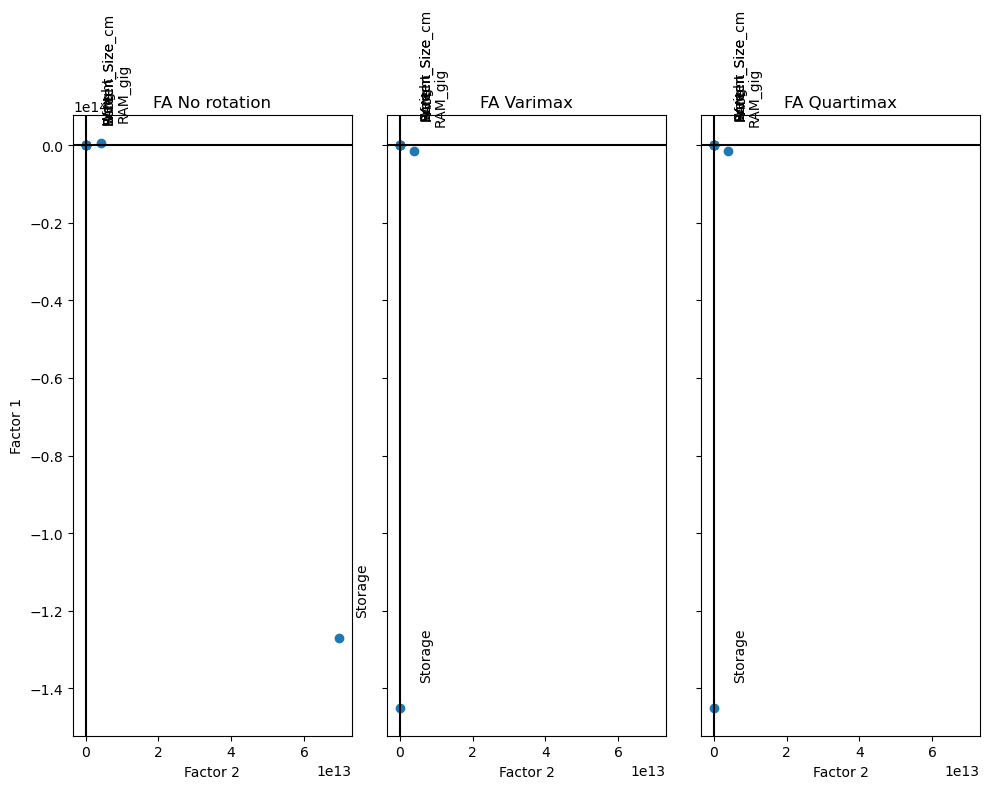

In [22]:

methods = [
    ("FA No rotation", FactorAnalysis(2,)),
    ("FA Varimax", FactorAnalysis(2, rotation="varimax")),
    ("FA Quartimax", FactorAnalysis(2, rotation="quartimax")),
]

fig, axes = plt.subplots(ncols=3, figsize=(10, 8), sharex=True, sharey=True)

for ax, (method, fa) in zip(axes, methods):
    fa = fa.fit(dataset)
    components = fa.components_
    vmax = np.abs(components).max()

    ax.scatter(components[0, :], components[1, :])
    ax.axhline(0, -1, 1, color='k')
    ax.axvline(0, -1, 1, color='k')

    for i, j, z in zip(components[0, :], components[1, :], dataset.columns):
        ax.text(i + 0.05 * vmax, j + 0.05 * vmax, str(z), ha="center", rotation=90)

    ax.set_title(str(method))
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel("Factor 1")
    ax.set_xlabel("Factor 2")

plt.tight_layout()
plt.show()


c:\Users\Matin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Matin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Matin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Matin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

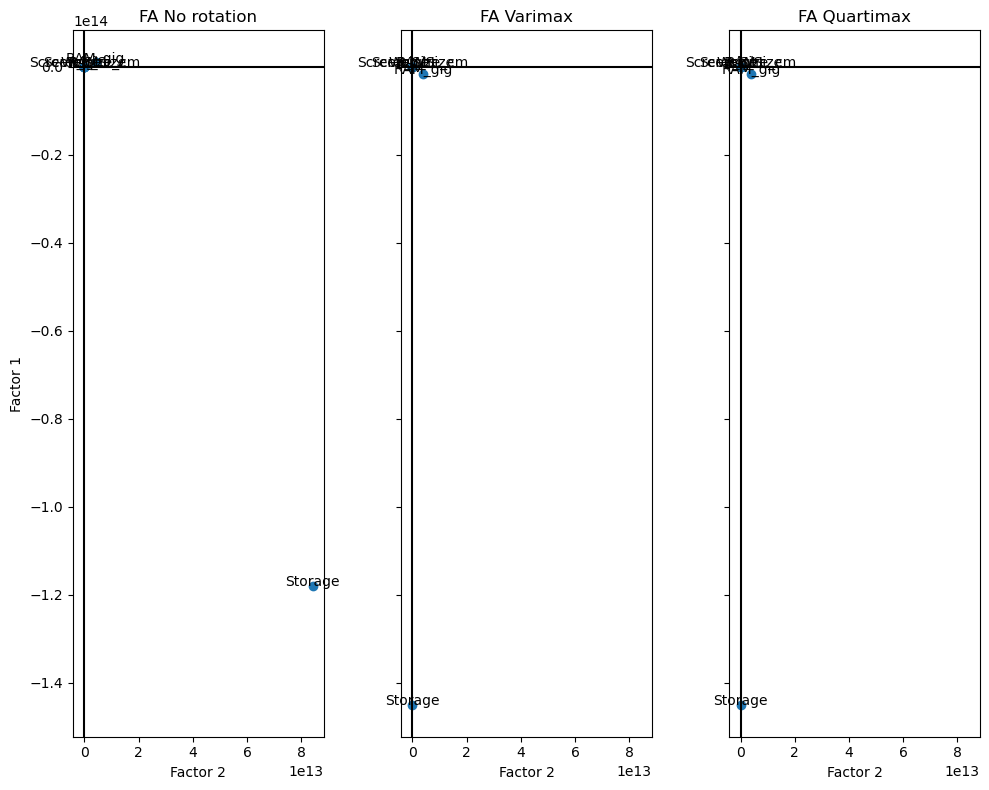

In [28]:
methods = [
    ("FA No rotation", FactorAnalysis(2,)),
    ("FA Varimax", FactorAnalysis(2, rotation="varimax")),
    ("FA Quartimax", FactorAnalysis(2, rotation="quartimax")),
]
fig, axes = plt.subplots(ncols=3, figsize=(10, 8), sharex=True, sharey=True)

for ax, (method, fa) in zip(axes, methods):
    fa = fa.fit(dataset)

    components = fa.components_

    vmax = np.abs(components).max()
    ax.scatter(components[0,:], components[1, :])
    ax.axhline(0, -1, 1, color='k')
    ax.axvline(0, -1, 1, color='k')
    for i,j, z in zip(components[0, :], components[1, :], dataset.columns):
        ax.text(i+.02, j+.02, str(z), ha="center")
    ax.set_title(str(method))
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel("Factor 1")
    ax.set_xlabel("Factor 2")

plt.tight_layout()
plt.show()